# Data Exploration and Analysis

In [1]:
import pandas as pd
import numpy as np

# Read in our data and restrict our data to comments with text in the body
df = pd.read_csv('Reddit_Comments_7M_2019.csv')

# Did a tiny bit of cleaning here
df = df[df['body'].notnull()]

C:\Users\Adrien\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
#Let's see what our data looks like

display(df.head())
display(df['subreddit'].value_counts())

,all_awardings,author,author_cakeday,author_created_utc,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,author_flair_text_color,...,parent_id,permalink,retrieved_on,score,send_replies,stickied,subreddit,subreddit_id,total_awards_received,updated_utc
0,NaN,jayburd13,NaN,1.401375e+09,NaN,NaN,[],NaN,NaN,NaN,...,t3_ab8wps,/r/leagueoflegends/comments/ab8wps/whats_the_b...,1546300806,1,True,False,leagueoflegends,t5_2rfxx,NaN,1.546301e+09
1,NaN,seifyk,NaN,1.375508e+09,NaN,750k party,[],06a2fafc-f4fd-11e8-b863-0e39835cd282,Genuine 750k Party Pin,dark,...,t1_ecz96p9,/r/GlobalOffensive/comments/aaz48j/thorins_top...,1546300809,1,True,False,GlobalOffensive,t5_2sqho,NaN,1.546301e+09
2,NaN,ClingerOn,NaN,1.540412e+09,NaN,NaN,[],NaN,NaN,NaN,...,t1_ecz5udy,/r/hiphopheads/comments/ab966a/machine_gun_kel...,1546300813,1,True,False,hiphopheads,t5_2rh4c,NaN,1.546301e+09
3,NaN,SushiStood,NaN,1.465989e+09,NaN,750k party,[],06a2fafc-f4fd-11e8-b863-0e39835cd282,Genuine 750k Party Pin,dark,...,t3_abcrwy,/r/GlobalOffensive/comments/abcrwy/alttab/ecza...,1546300814,1,True,False,GlobalOffensive,t5_2sqho,NaN,1.546301e+09
4,NaN,bbjimin,NaN,1.487492e+09,NaN,nidalee,"[{'e': 'text', 't': 'peanut best girl - SKT화이팅...",7c4fb678-baa1-11e8-9836-0ec6dedb3898,peanut best girl - SKT화이팅! - CJ Flame :hearteyes:,dark,...,t1_eczav82,/r/leagueoflegends/comments/aba6t3/i_played_ov...,1546300819,1,True,False,leagueoflegends,t5_2rfxx,NaN,1.546301e+09


leagueoflegends        3020255
hiphopheads            1150540
GlobalOffensive         929682
Android                 567695
MechanicalKeyboards     449603
ProgrammerHumor         383040
cscareerquestions       283356
Kanye                   263177
malefashionadvice       230993
indieheads              212177
frugalmalefashion       144106
fantanoforever           29047
CalPoly                  11199
Name: subreddit, dtype: int64

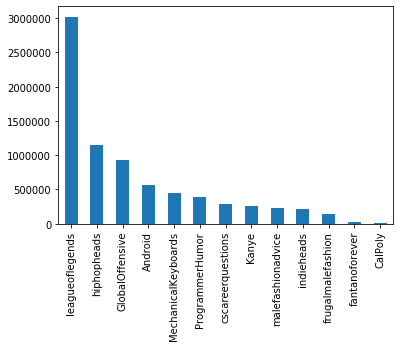

In [4]:
# Here is the data spread. /r/leagueoflegends is massive compared to the rest, with ~3 million comments of the 7.6 million
# coming from that subreddit alone

df['subreddit'].value_counts().plot.bar()

In [5]:
# saves just the comments for later use
# I sample 3,000,000 comments just for my own sanity when running later code.

comment_text = df['body'].sample(3000000)

In [6]:
comment_text

2704058    Lmao chill out. Dont call me defensive when yo...
4724648    Proof that kills don’t fucking matter so stop ...
3352575                                   Button the jacket 
1011054    Thankyou! cant wait to build this one, hoping ...
3128111                                   Rhaast and aatrox 
                                 ...                        
7367562    Is JACKZ the best XM1014 user? I've seen two i...
3534901    That's 2 Namis in the span of less than a week...
3747095    Velocifire is a decent budget choice that come...
3548856    Any reason there isn’t a Thursday sticky about...
5241013    Im not too sure I understand what you mean. bu...
Name: body, Length: 3000000, dtype: object

# Looking at Words

In this section I want to merely compare what kinds of words I get when I compare a standard term frequency fit to a TF-IDF. I will also look at different n_gram ranges and different max_features. I just want to get a feel for what

## Bag of Words

In [7]:
from collections import Counter


words = (
    " ".join(comment_text).
    lower().
    replace("[^\w\s]", " ").
    split()
)

In [8]:
bag_of_words = Counter(words)
bag_of_words

Counter({'lmao': 22515,
         'chill': 3181,
         'out.': 15945,
         'dont': 42759,
         'call': 19661,
         'me': 178659,
         'defensive': 1982,
         'when': 217308,
         'you': 1123035,
         'wrote': 4316,
         'a': 1846367,
         '6': 16649,
         'paragraph': 644,
         'essay': 325,
         'to': 1868929,
         'argue': 6495,
         'with': 531754,
         'someone': 62028,
         'on': 598054,
         'the': 2804972,
         'internet': 6607,
         'because': 224709,
         'forgot': 7454,
         'that': 937739,
         'sites': 2120,
         'like': 428540,
         'google,': 1234,
         'youtube,': 673,
         'instagram,': 209,
         'quora,': 10,
         'spotify,': 402,
         'reddit,': 1274,
         'etc': 6609,
         'exist': 4342,
         'for': 772662,
         'second': 23120,
         'there.': 14041,
         'proof': 3377,
         'kills': 8627,
         'don’t': 47970,
         

In [9]:
series_of_words = pd.Series(bag_of_words)
series_of_words

lmao          22515
chill          3181
out.          15945
dont          42759
call          19661
              ...  
they're'll        1
ergo-style        1
1.5u-sized        1
(~$80)            1
*zeyzal           1
Length: 1302304, dtype: int64

There are 1307475 unique words in our sample of 3 million comments.

In the graph below, you can see the top 10 words from the sample 3 million comments. No surprises here. You can see that even in the top 10 words, the counts drop quite quickly (from 2,500,000+ to 1,000,000+)

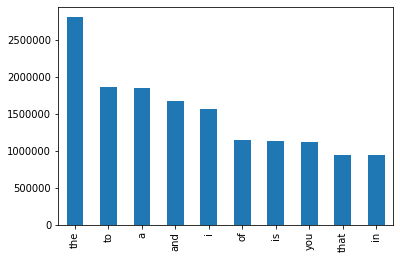

In [10]:
series_of_words.sort_values(ascending=False)[:10].plot.bar()

In this graph, I plot the top 100 and 250 words. The labels aren't very legible but I'm not particularly concerned with the actual words. I just want to see the distribution as we add more words.

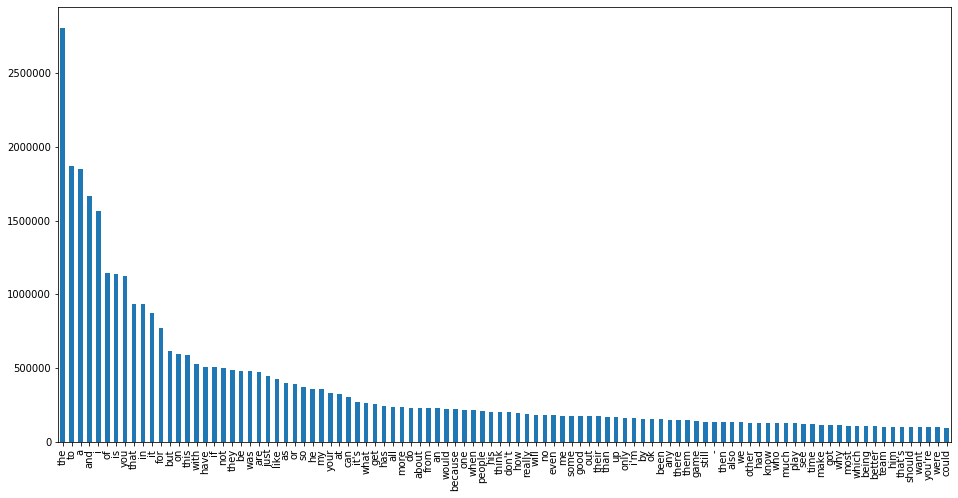

In [11]:
series_of_words.sort_values(ascending=False)[:100].plot.bar(figsize=(16,8))

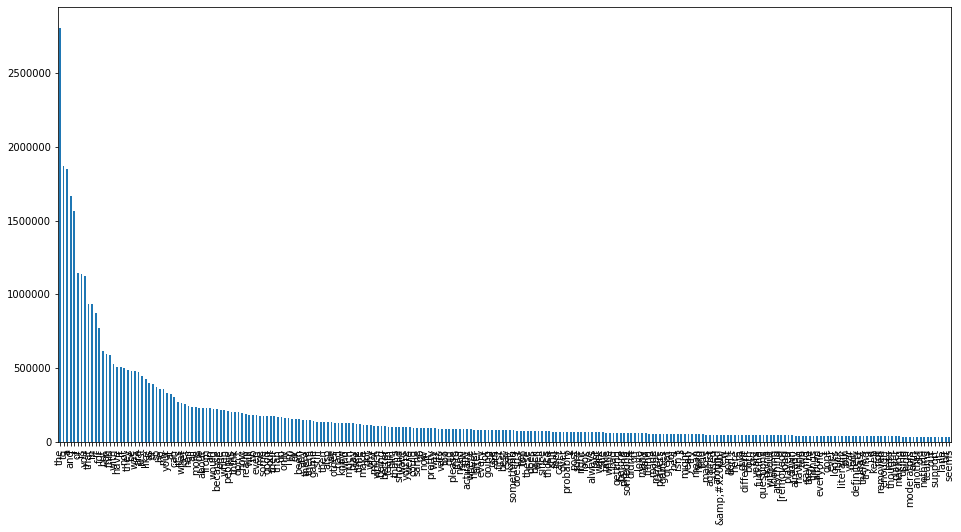

In [12]:
series_of_words.sort_values(ascending=False)[:250].plot.bar(figsize=(16,8))

### Here are the top 100 words

Can you see any interesting words here?

In [13]:
series_of_words.sort_values(ascending=False)[:100].index

Index(['the', 'to', 'a', 'and', 'i', 'of', 'is', 'you', 'that', 'in', 'it',
       'for', 'but', 'on', 'this', 'with', 'have', 'if', 'not', 'they', 'be',
       'was', 'are', 'just', 'like', 'as', 'or', 'so', 'he', 'my', 'your',
       'at', 'can', 'it's', 'what', 'get', 'has', 'all', 'more', 'do', 'about',
       'from', 'an', 'would', 'because', 'one', 'when', 'people', 'his',
       'think', 'don't', 'how', 'really', 'will', 'no', 'even', 'me', 'some',
       'good', 'out', 'their', 'than', 'up', 'only', 'i'm', 'by', 'ok', 'been',
       'any', 'there', 'them', 'game', 'still', '-', 'then', 'also', 'we',
       'other', 'had', 'know', 'who', 'much', 'play', 'see', 'time', 'make',
       'got', 'why', 'most', 'which', 'being', 'better', 'team', 'him',
       'that's', 'should', 'want', 'you're', 'were', 'could'],
      dtype='object')

Some things I picked up: **game**, **play**, **team**. These are likely coming from /r/leagueoflegends and /r/globaloffensive which are well represented in our data because those subreddits have lots of comments

### Top 500 Words

In [14]:
list(series_of_words.sort_values(ascending=False)[:500].index)

['the',
 'to',
 'a',
 'and',
 'i',
 'of',
 'is',
 'you',
 'that',
 'in',
 'it',
 'for',
 'but',
 'on',
 'this',
 'with',
 'have',
 'if',
 'not',
 'they',
 'be',
 'was',
 'are',
 'just',
 'like',
 'as',
 'or',
 'so',
 'he',
 'my',
 'your',
 'at',
 'can',
 "it's",
 'what',
 'get',
 'has',
 'all',
 'more',
 'do',
 'about',
 'from',
 'an',
 'would',
 'because',
 'one',
 'when',
 'people',
 'his',
 'think',
 "don't",
 'how',
 'really',
 'will',
 'no',
 'even',
 'me',
 'some',
 'good',
 'out',
 'their',
 'than',
 'up',
 'only',
 "i'm",
 'by',
 'ok',
 'been',
 'any',
 'there',
 'them',
 'game',
 'still',
 '-',
 'then',
 'also',
 'we',
 'other',
 'had',
 'know',
 'who',
 'much',
 'play',
 'see',
 'time',
 'make',
 'got',
 'why',
 'most',
 'which',
 'being',
 'better',
 'team',
 'him',
 "that's",
 'should',
 'want',
 "you're",
 'were',
 'could',
 'same',
 'go',
 'now',
 'it.',
 'pretty',
 'way',
 'its',
 'very',
 'too',
 'did',
 'please',
 'into',
 'need',
 'new',
 'actually',
 'where',
 'never

In the top 500 there are plenty of unique words to see here. Some random ones I noticed: **"riot"** (company that makes leagueoflegends), **"lane"** (league term), **"g2"** (esports team), **"google"**, **"kill"** (likely from video game subreddits), **"android"**, **"code"**, **"album"** 

# TF and TF-IDF

In [15]:
# Import our packages we will use

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
tf_vec = CountVectorizer()

tf_vec.fit(comment_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [17]:
len(tf_vec.get_feature_names())

470821

While our bag of words found 1307475 unique words, the CountVectorizer only found 472831 unique words. 

In [18]:
# Here I set up the first couple vectorizers I want to analyze

#Max features of 100, 250, 500, 1000
tf_vec_100 = CountVectorizer(max_features=100)
tf_vec_250 = CountVectorizer(max_features=250)
tf_vec_500 = CountVectorizer(max_features=500)
tf_vec_1000 = CountVectorizer(max_features=1000)

# I put them in a series so I can do some .apply() magic to all of them at once and write less repetitive code
vects = pd.Series([tf_vec_100, tf_vec_250, tf_vec_500, tf_vec_1000])
vects

0    CountVectorizer(analyzer='word', binary=False,...
1    CountVectorizer(analyzer='word', binary=False,...
2    CountVectorizer(analyzer='word', binary=False,...
3    CountVectorizer(analyzer='word', binary=False,...
dtype: object

In [19]:
vects.apply(lambda x : x.fit(comment_text))

0    CountVectorizer(analyzer='word', binary=False,...
1    CountVectorizer(analyzer='word', binary=False,...
2    CountVectorizer(analyzer='word', binary=False,...
3    CountVectorizer(analyzer='word', binary=False,...
dtype: object

In [20]:
vects.apply(lambda x : x.get_feature_names())

0    [about, all, also, amp, an, and, any, are, as,...
1    [10, about, actually, after, again, against, a...
2    [10, 100, 20, 50, able, about, absolutely, act...
3    [10, 100, 12, 15, 16, 20, 2018, 2019, 25, 2fr,...
dtype: object

In [21]:
# Printing these long lists takes lots of screen space, so I want to print the list in multiple columns

def print_list(l):
    count = 1
    for e in l:
        if count % 10 != 0:
            print(e, end=", ")
        else:
            print(e + ',')
        count += 1

In [22]:
print_list(vects[0].get_feature_names())

about, all, also, amp, an, and, any, are, as, at,
be, because, been, better, but, by, can, com, do, don,
even, for, from, game, get, good, got, gt, had, has,
have, he, him, his, how, https, if, in, is, it,
just, know, like, make, me, more, most, much, my, no,
not, now, of, ok, on, one, only, or, other, out,
people, play, re, really, reddit, see, so, some, still, team,
than, that, the, their, them, then, there, they, think, this,
time, to, too, up, ve, was, way, we, well, what,
when, which, who, why, will, with, would, www, you, your,


In [23]:
vects[0].max_features

100

In [24]:
for vect in vects:
    print("Max Features:", vect.max_features)
    print()
    print_list(vect.get_feature_names())
    print()

Max Features: 100

about, all, also, amp, an, and, any, are, as, at,
be, because, been, better, but, by, can, com, do, don,
even, for, from, game, get, good, got, gt, had, has,
have, he, him, his, how, https, if, in, is, it,
just, know, like, make, me, more, most, much, my, no,
not, now, of, ok, on, one, only, or, other, out,
people, play, re, really, reddit, see, so, some, still, team,
than, that, the, their, them, then, there, they, think, this,
time, to, too, up, ve, was, way, we, well, what,
when, which, who, why, will, with, would, www, you, your,

Max Features: 250

10, about, actually, after, again, against, album, all, already, also,
always, am, amp, an, and, any, anything, are, around, as,
at, automatically, back, bad, be, because, been, before, being, best,
better, big, bot, both, but, by, can, com, compose, could,
damage, day, definitely, did, didn, different, do, does, doesn, doing,
don, dont, down, enough, even, ever, every, everyone, feel, few,
find, first, for, from, fuc

I think 500 or 1000 words gives us a good spread and unique words. In the machine learning portion of this project I will be sure to play around with different values for max_features.

In [25]:
df_reduced = df.loc[comment_text.index][['body', 'subreddit']]
df_reduced

,body,subreddit
2704058,Lmao chill out. Dont call me defensive when yo...,ProgrammerHumor
4724648,Proof that kills don’t fucking matter so stop ...,leagueoflegends
3352575,Button the jacket,malefashionadvice
1011054,"Thankyou! cant wait to build this one, hoping ...",MechanicalKeyboards
3128111,Rhaast and aatrox,leagueoflegends
...,...,...
7367562,Is JACKZ the best XM1014 user? I've seen two i...,GlobalOffensive
3534901,That's 2 Namis in the span of less than a week...,leagueoflegends
3747095,Velocifire is a decent budget choice that come...,MechanicalKeyboards
3548856,Any reason there isn’t a Thursday sticky about...,hiphopheads


# Let's do some comparisons between all of our subreddits

Going to use 500 as max features to speed this process up and make my life easier.

### Term Frequencies

In [26]:
subreddit_words = df_reduced.groupby('subreddit')['body'].apply(lambda x : x.str.cat(sep=' '))
subreddit_words

subreddit
Android                Find me that without curved edges plz. Well, I...
CalPoly                Minecraft 2: Electric Boogaloo gang They chang...
GlobalOffensive        I like the Enfu unicorn there. I don't know if...
Kanye                  Hope he ain't too cool for a seatbelt  All lov...
MechanicalKeyboards    Thankyou! cant wait to build this one, hoping ...
ProgrammerHumor        Lmao chill out. Dont call me defensive when yo...
cscareerquestions      I'm a data engineer. Manipulating and moving d...
fantanoforever         With other genres it is more understandable be...
frugalmalefashion      Luxitica is really bad price:quality ratio. Se...
hiphopheads            maybe if they were different and good Bruh if ...
indieheads             Yeah I saw this and Tacoma and immediately hop...
leagueoflegends        Proof that kills don’t fucking matter so stop ...
malefashionadvice      Button the jacket  Honestly, I'm not too sure....
Name: body, dtype: object

In the cell above I combined all comments from each subreddit into one long string. This gives me the opportunity too compare the subreddits to each other. Recall how we did this with Dr. Seuss in one of the lessons. In my case we treat each subreddit as its own book.

In [27]:
vec = CountVectorizer(max_features=500)

In [28]:
counts = vec.fit_transform(subreddit_words)

In [29]:
from sklearn.metrics.pairwise import cosine_similarity

cos_sims = pd.DataFrame(cosine_similarity(counts.todense()), columns=subreddit_words.index, index=subreddit_words.index)
cos_sims

subreddit,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit,,,,,,,,,,,,,
Android,1.000000,0.965961,0.971390,0.946808,0.976285,0.975236,0.946079,0.940422,0.963197,0.948165,0.960440,0.956993,0.946210
CalPoly,0.965961,1.000000,0.981022,0.951371,0.971746,0.982128,0.986801,0.943040,0.965536,0.958183,0.964608,0.974516,0.951775
GlobalOffensive,0.971390,0.981022,1.000000,0.961951,0.969283,0.979570,0.966902,0.955594,0.963837,0.968807,0.963481,0.989446,0.952405
Kanye,0.946808,0.951371,0.961951,1.000000,0.950167,0.960683,0.928163,0.983293,0.934199,0.988577,0.972638,0.956131,0.914404
MechanicalKeyboards,0.976285,0.971746,0.969283,0.950167,1.000000,0.971843,0.949820,0.941210,0.974395,0.948383,0.963293,0.953223,0.952993
ProgrammerHumor,0.975236,0.982128,0.979570,0.960683,0.971843,1.000000,0.974111,0.951419,0.957239,0.961455,0.964276,0.969939,0.949546
cscareerquestions,0.946079,0.986801,0.966902,0.928163,0.949820,0.974111,1.000000,0.913898,0.945817,0.934996,0.937914,0.960679,0.943037
fantanoforever,0.940422,0.943040,0.955594,0.983293,0.941210,0.951419,0.913898,1.000000,0.922913,0.992301,0.976828,0.953535,0.901956
frugalmalefashion,0.963197,0.965536,0.963837,0.934199,0.974395,0.957239,0.945817,0.922913,1.000000,0.939570,0.957852,0.948080,0.969150


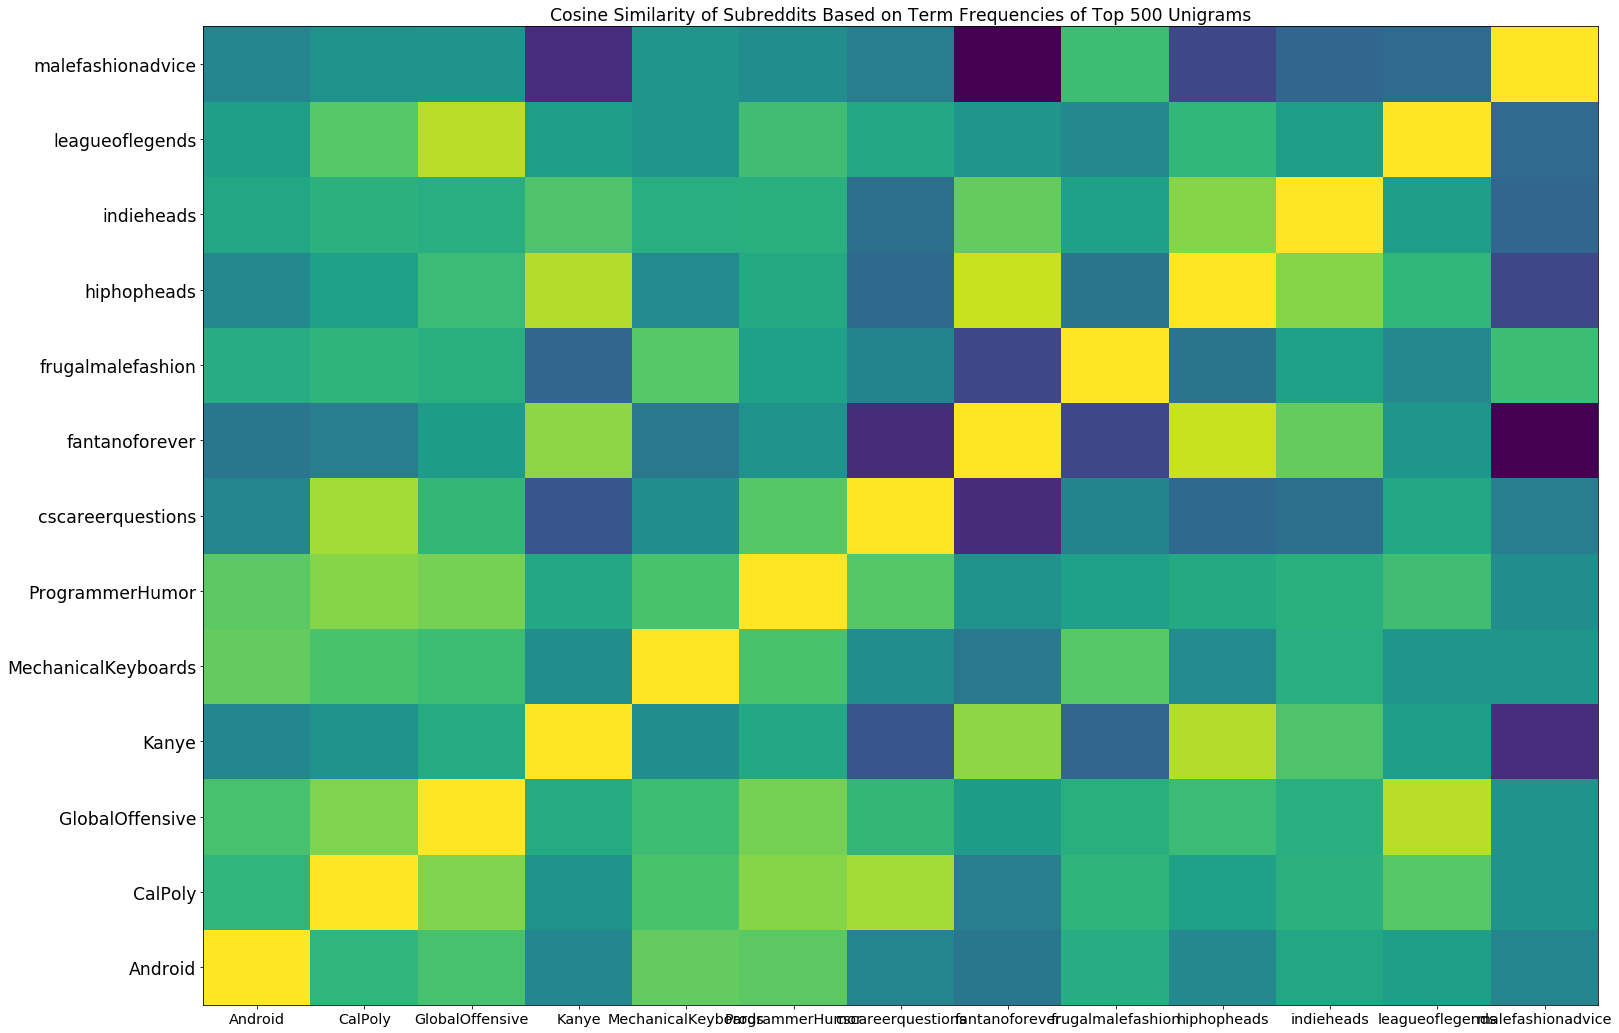

In [36]:
import matplotlib.pyplot as plt

plt.pcolor(cos_sims, figure=plt.figure(figsize=(25,18)))
plt.yticks(np.arange(0.5, len(cos_sims.index), 1), cos_sims.index, fontsize='xx-large')
plt.xticks(np.arange(0.5, len(cos_sims.columns), 1), cos_sims.columns, fontsize='x-large')
plt.title('Cosine Similarity of Subreddits Based on Term Frequencies of Top 500 Unigrams', fontsize='xx-large')
plt.show()

Darker (purple/blue) squares are more different while lighter (more yellow) squares are most similar. You can see that each subreddit is most similar to itself.

### TF-IDF

In [38]:
vec = TfidfVectorizer(max_features=500)
tfidf = vec.fit_transform(subreddit_words)

In [39]:
cos_sims = pd.DataFrame(cosine_similarity(tfidf.todense()), columns=subreddit_words.index, index=subreddit_words.index)
cos_sims

subreddit,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit,,,,,,,,,,,,,
Android,1.000000,0.965903,0.971293,0.946761,0.975958,0.975232,0.946036,0.940374,0.963173,0.948127,0.960395,0.955453,0.946044
CalPoly,0.965903,1.000000,0.980941,0.951362,0.971434,0.982101,0.986793,0.943031,0.965506,0.958171,0.964599,0.972943,0.951526
GlobalOffensive,0.971293,0.980941,1.000000,0.961846,0.968890,0.979492,0.966852,0.955488,0.963764,0.968715,0.963377,0.987971,0.952228
Kanye,0.946761,0.951362,0.961846,1.000000,0.949874,0.960659,0.928141,0.983293,0.934178,0.988574,0.972638,0.954594,0.914176
MechanicalKeyboards,0.975958,0.971434,0.968890,0.949874,1.000000,0.971537,0.949507,0.940917,0.974075,0.948088,0.962995,0.951399,0.952478
ProgrammerHumor,0.975232,0.982101,0.979492,0.960659,0.971537,1.000000,0.974092,0.951395,0.957227,0.961437,0.964254,0.968383,0.949372
cscareerquestions,0.946036,0.986793,0.966852,0.928141,0.949507,0.974092,1.000000,0.913875,0.945794,0.934977,0.937892,0.959134,0.942836
fantanoforever,0.940374,0.943031,0.955488,0.983293,0.940917,0.951395,0.913875,1.000000,0.922892,0.992298,0.976828,0.951996,0.901729
frugalmalefashion,0.963173,0.965506,0.963764,0.934178,0.974075,0.957227,0.945794,0.922892,1.000000,0.939562,0.957833,0.946573,0.969031


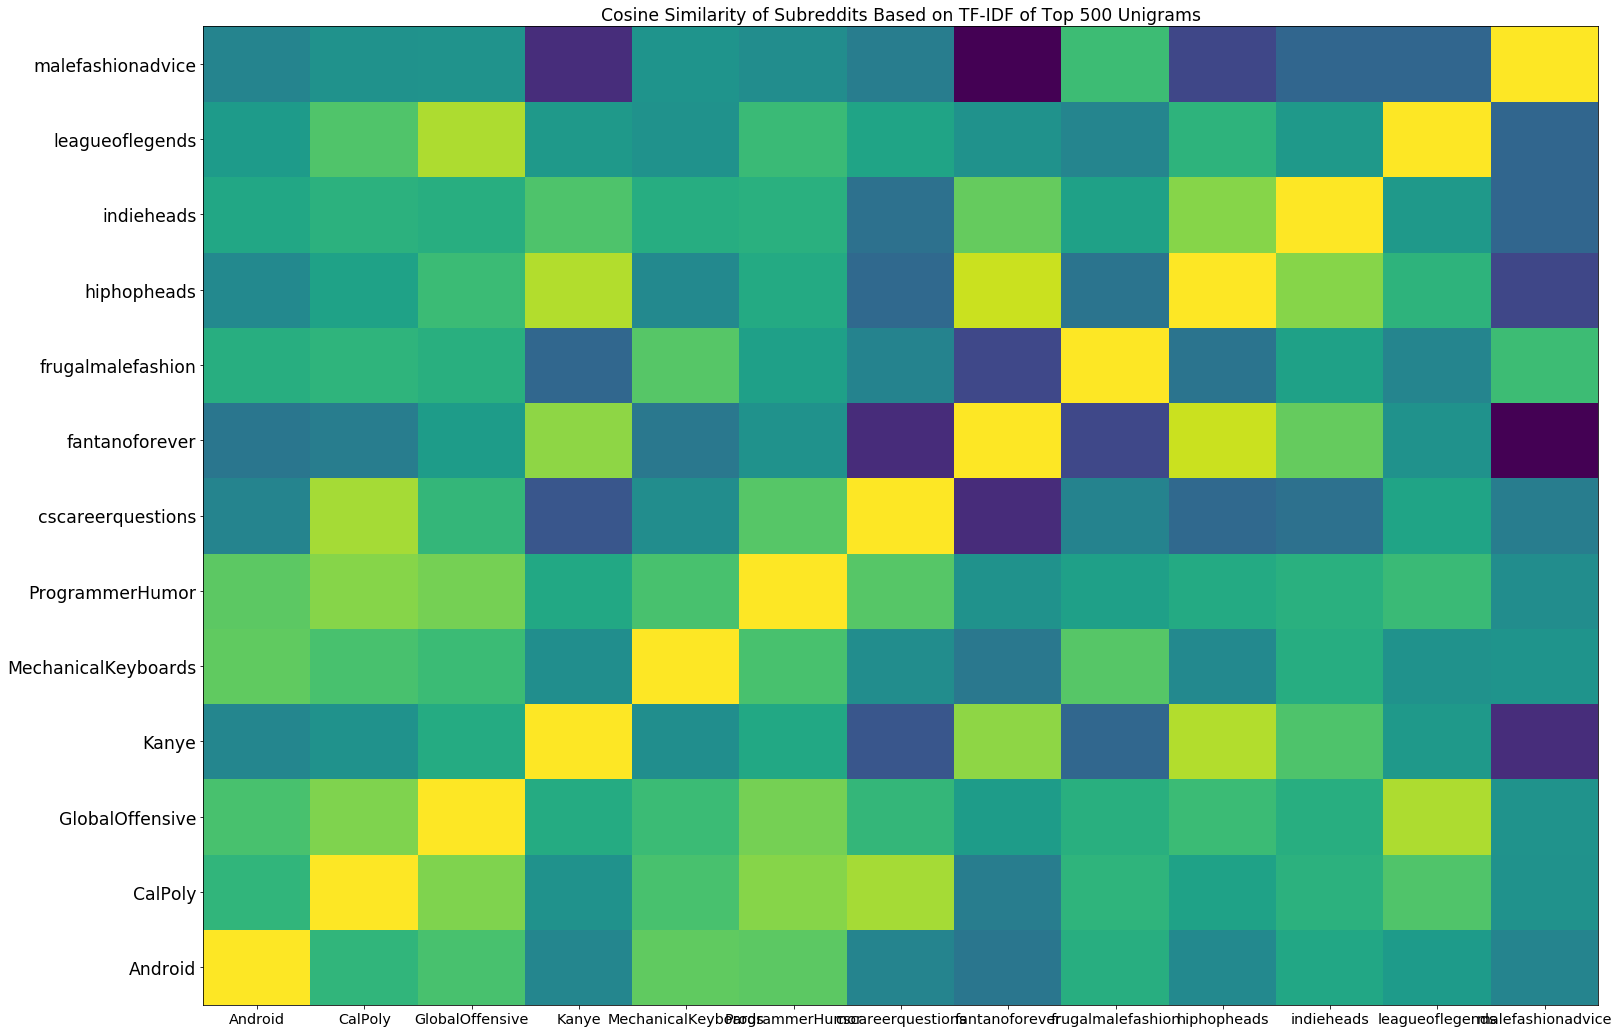

In [40]:
plt.pcolor(cos_sims, figure=plt.figure(figsize=(25,18)))
plt.yticks(np.arange(0.5, len(cos_sims.index), 1), cos_sims.index, fontsize='xx-large')
plt.xticks(np.arange(0.5, len(cos_sims.columns), 1), cos_sims.columns, fontsize='x-large')
plt.title('Cosine Similarity of Subreddits Based on TF-IDF of Top 500 Unigrams', fontsize='xx-large')
plt.show()

Comparing the two heatmaps, I can't find much difference between the two of them. It will be interesting to see the change in accuracy between the two methods of calculating word frequency in the machine learning.

## What happens when we introduce bigrams?

I will continute to use max_features=500, but now I want to see what happens when I change the ngram_range. Changing the ngram_range means that bigrams will be introduced into the mix.

In [41]:
vec = TfidfVectorizer(max_features=500, ngram_range=(1,2))
tfidf = vec.fit_transform(subreddit_words)

While we're here, lets also see the top words

In [42]:
print_list(vec.get_feature_names())

10, 100, able, able to, about, about the, action, action was, actually, adc,
after, again, against, ago, agree, album, all, all the, almost, already,
also, always, am, am bot, amp, amp x200b, an, and, and it, and the,
and then, and they, and this, and you, android, another, any, any questions, anyone, anything,
are, aren, around, as, as well, at, at all, at least, at the, automatically,
automatically please, away, back, bad, basically, be, because, been, been removed, before,
being, best, better, between, big, bit, black, bot, bot and, both,
but, but it, but the, buy, by, can, can be, case, champ, champion,
champions, champs, change, code, com, come, comment, comments, company, compose,
compose to, concerns, contact, contact the, could, cs, damage, day, definitely, did,
didn, different, do, do you, does, doesn, doing, don, don know, don think,
done, dont, down, dude, early, either, else, end, enemy, enough,
especially, etc, even, ever, every, everyone, everything, experience, far, feel

Not too many bigrams here. Most of them are just 'the [x]'. Regardless, let's take a look at what the heatmap and cosine similarity matrix looks like now

In [43]:
cos_sims = pd.DataFrame(cosine_similarity(tfidf.todense()), columns=subreddit_words.index, index=subreddit_words.index)
cos_sims

subreddit,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit,,,,,,,,,,,,,
Android,1.000000,0.966071,0.972054,0.954511,0.978892,0.975991,0.946155,0.941215,0.964859,0.949402,0.961582,0.953592,0.939714
CalPoly,0.966071,1.000000,0.979288,0.957767,0.973943,0.981629,0.986926,0.942816,0.966161,0.958362,0.964475,0.970069,0.940977
GlobalOffensive,0.972054,0.979288,1.000000,0.967618,0.970548,0.979130,0.966076,0.954117,0.965404,0.968491,0.962609,0.985100,0.947783
Kanye,0.954511,0.957767,0.967618,1.000000,0.959162,0.967423,0.934392,0.989049,0.941465,0.993876,0.979596,0.958534,0.909614
MechanicalKeyboards,0.978892,0.973943,0.970548,0.959162,1.000000,0.973528,0.951880,0.943415,0.977067,0.951027,0.965882,0.951015,0.943961
ProgrammerHumor,0.975991,0.981629,0.979130,0.967423,0.973528,1.000000,0.973624,0.951129,0.958454,0.961844,0.964294,0.965750,0.942610
cscareerquestions,0.946155,0.986926,0.966076,0.934392,0.951880,0.973624,1.000000,0.913452,0.946876,0.935406,0.937513,0.956599,0.934301
fantanoforever,0.941215,0.942816,0.954117,0.989049,0.943415,0.951129,0.913452,1.000000,0.923499,0.992212,0.977335,0.949004,0.890329
frugalmalefashion,0.964859,0.966161,0.965404,0.941465,0.977067,0.958454,0.946876,0.923499,1.000000,0.941320,0.959352,0.945282,0.962386


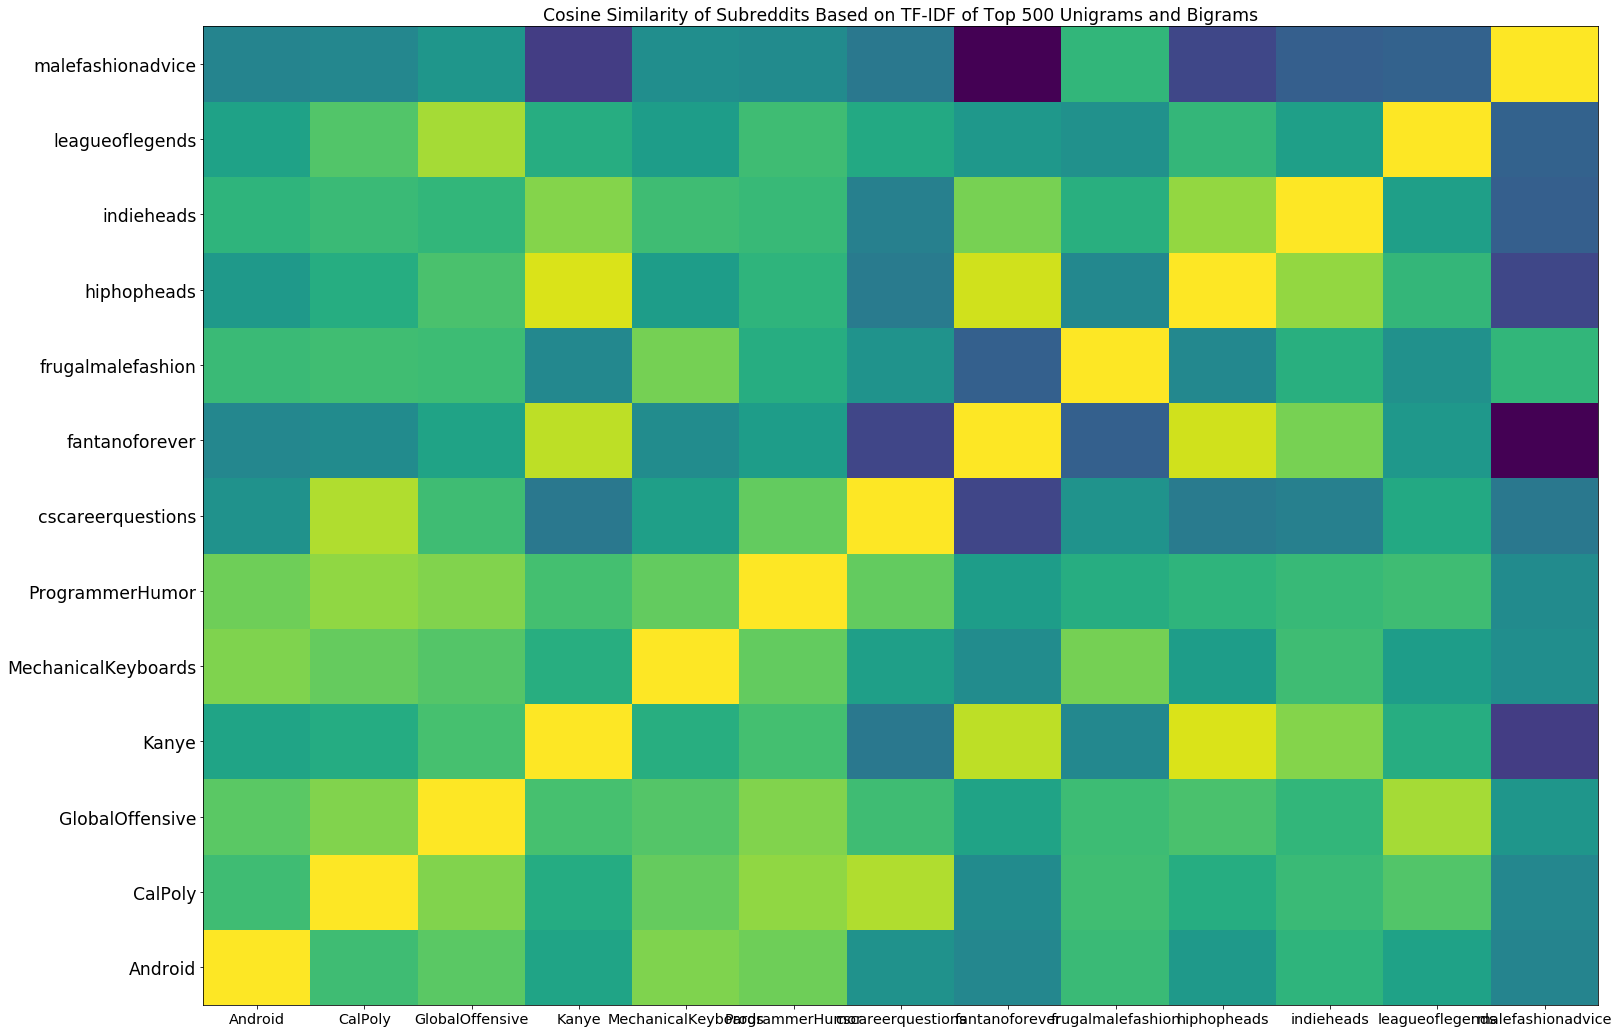

In [44]:
plt.pcolor(cos_sims, figure=plt.figure(figsize=(25,18)))
plt.yticks(np.arange(0.5, len(cos_sims.index), 1), cos_sims.index, fontsize='xx-large')
plt.xticks(np.arange(0.5, len(cos_sims.columns), 1), cos_sims.columns, fontsize='x-large')
plt.title('Cosine Similarity of Subreddits Based on TF-IDF of Top 500 Unigrams and Bigrams', fontsize='xx-large')
plt.show()

Numbers in the matrix and heatmap look very similar to the previous ones. Next let's look at just bigrams

### Just bigrams

Decided to only look at bigrams and see if now there is any big difference. Hopefully there is but I suspect the trend of "the" + [another word] will continue to dominate the top bigrams.

In [45]:
vec = TfidfVectorizer(max_features=500, ngram_range=(2,2))
tfidf = vec.fit_transform(subreddit_words)
print_list(vec.get_feature_names())

able to, about it, about the, action was, after the, agree with, all of, all the, am bot, amount of,
amp 32, amp x200b, and can, and don, and get, and have, and he, and if, and is, and it,
and just, and not, and that, and the, and then, and they, and this, and we, and you, any of,
any questions, are just, are not, are the, are you, as an, as it, as much, as the, as well,
as you, at all, at least, at the, at this, automatically please, back to, based on, be able, be the,
because he, because it, because of, because the, because they, because you, been removed, better than, bot and, but don,
but he, but if, but it, but not, but that, but the, but they, but this, but you, by the,
can be, can do, can get, can see, can you, com android, com leagueoflegends, com message, com watch, compared to,
compose to, contact the, could be, did you, do it, do not, do that, do with, do you, does not,
don get, don have, don know, don think, don want, due to, easy to, end of, enough to, even if,
even though

In [46]:
cos_sims = pd.DataFrame(cosine_similarity(tfidf.todense()), columns=subreddit_words.index, index=subreddit_words.index)
cos_sims

subreddit,Android,CalPoly,GlobalOffensive,Kanye,MechanicalKeyboards,ProgrammerHumor,cscareerquestions,fantanoforever,frugalmalefashion,hiphopheads,indieheads,leagueoflegends,malefashionadvice
subreddit,,,,,,,,,,,,,
Android,1.000000,0.757198,0.806103,0.748290,0.795591,0.772331,0.749680,0.710625,0.764037,0.732713,0.731769,0.652238,0.642301
CalPoly,0.757198,1.000000,0.842939,0.846308,0.913933,0.835616,0.956158,0.819411,0.835615,0.849912,0.836456,0.736755,0.603194
GlobalOffensive,0.806103,0.842939,1.000000,0.824170,0.862685,0.847747,0.870300,0.779869,0.889259,0.845834,0.795047,0.787079,0.788452
Kanye,0.748290,0.846308,0.824170,1.000000,0.866685,0.829796,0.809573,0.958279,0.792535,0.951754,0.933123,0.703793,0.555922
MechanicalKeyboards,0.795591,0.913933,0.862685,0.866685,1.000000,0.824469,0.897429,0.829867,0.910508,0.851534,0.862608,0.715992,0.643201
ProgrammerHumor,0.772331,0.835616,0.847747,0.829796,0.824469,1.000000,0.838305,0.755768,0.797636,0.786523,0.759082,0.708197,0.680485
cscareerquestions,0.749680,0.956158,0.870300,0.809573,0.897429,0.838305,1.000000,0.771054,0.843455,0.831338,0.784656,0.750568,0.665349
fantanoforever,0.710625,0.819411,0.779869,0.958279,0.829867,0.755768,0.771054,1.000000,0.748420,0.954225,0.947451,0.678862,0.509355
frugalmalefashion,0.764037,0.835615,0.889259,0.792535,0.910508,0.797636,0.843455,0.748420,1.000000,0.815280,0.807555,0.700013,0.794838


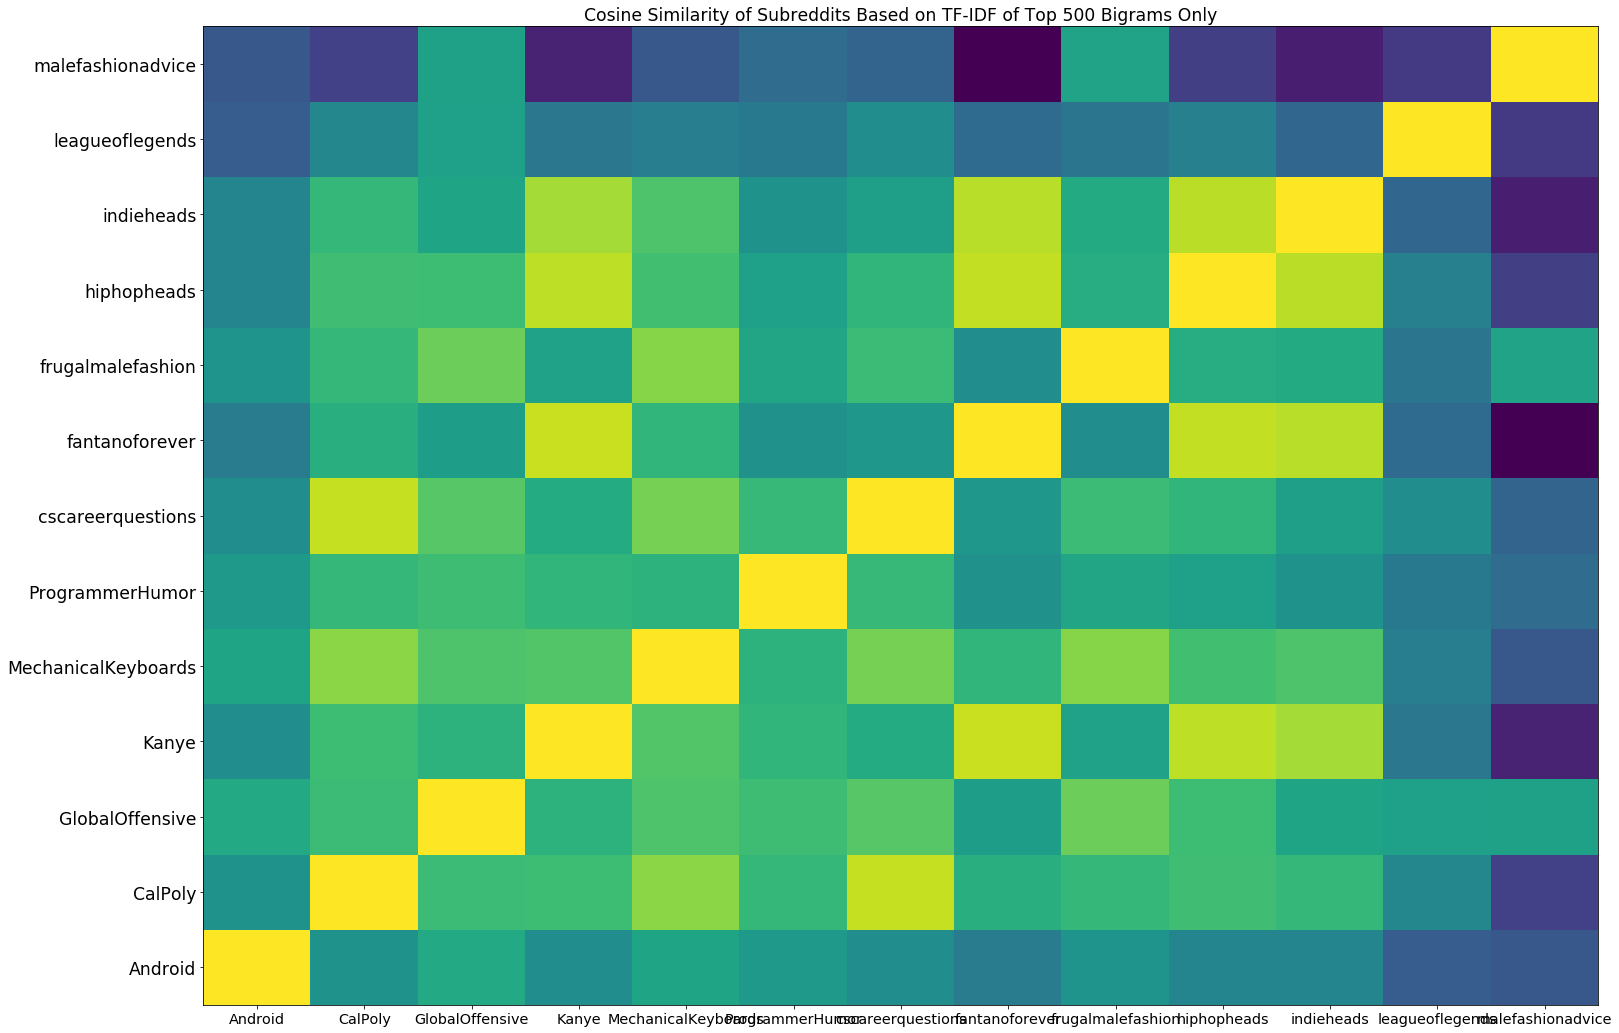

In [47]:
plt.pcolor(cos_sims, figure=plt.figure(figsize=(25,18)))
plt.yticks(np.arange(0.5, len(cos_sims.index), 1), cos_sims.index, fontsize='xx-large')
plt.xticks(np.arange(0.5, len(cos_sims.columns), 1), cos_sims.columns, fontsize='x-large')
plt.title('Cosine Similarity of Subreddits Based on TF-IDF of Top 500 Bigrams Only', fontsize='xx-large')
plt.show()

Finally some different results! Seems like we see more variability in similarity between the subreddits now. There are more clear similarities here. For example /r/fantanoforever is quite similar to /r/Kanye, /r/hiphopheads, and /r/indieheads. This makes sense because all 4 subreddits are about music, so I expect them to be very similar. My findings here lead me to think that I should use the top 500 unigrams and top 500 bigrams when I do my machine learning.

# Bonus Round: Graphing and Clustering

I wanted to flex some of my KDD skills and apply KMeans clustering to the data and use PCA dimension reduction so that I can graph it in a 2D space. It ended up not working very well and looking quite messy but I spent a fair amount of time on it so I wanted to keep it. The code was a mess and I accidentally deleted some cells so I'm just going to leave the cells that produced output.

In [89]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(2)
scaler = StandardScaler()
# I use the vectorizer from when we looked at just bigrams because it had the best variance of cosine distances
tfidf_scaled = scaler.fit_transform(tfidf.todense())
pca.fit(tfidf_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [90]:
x = pd.DataFrame(pca.transform(tfidf_scaled), columns=['PC1', 'PC2'], index=subreddit_words.index)

In [91]:
colors = pd.Series(x.index).map({
    'leagueoflegends': "red",
    'hiphopheads': "blue",
    'GlobalOffensive': "yellow",
    'Android': "green",
    'MechanicalKeyboards': "pink",
    'ProgrammerHumor': "maroon",
    'cscareerquestions': "magenta",
    'Kanye': "purple",
    'malefashionadvice': "orange",
    'indieheads': "darkgreen",
    'frugalmalefashion': "lawngreen",
    'fantanoforever': "black",
    'CalPoly': "darkorange"
})

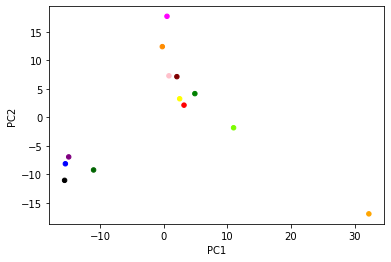

In [92]:
x.plot.scatter(x='PC1', y='PC2', c = colors)

It is hard to tell which subreddit is which because there are too many colors that look alike. Because of this, I will use Altair to graph the points so I can use tooltips.

In [ ]:
!pip install altair
from altair import *

In [102]:
graph_x = x.reset_index()
Chart(graph_x).mark_circle().encode(
    x="PC1",
    y="PC2",
    tooltip= "subreddit"
)

alt.Chart(...)

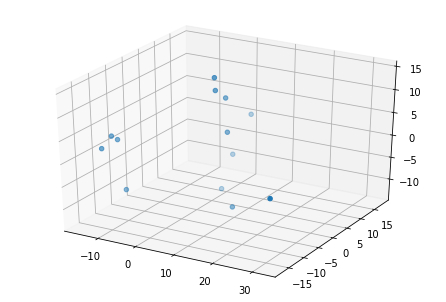

In [113]:
# For fun I plotted in 3D as well

from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

# PCA reduction into 3 dimensions now
pca = PCA(3)
pca.fit(tfidf_scaled)
x = pd.DataFrame(pca.transform(tfidf_scaled), columns=['PC1', 'PC2', 'PC3'], index=subreddit_words.index)

fig = pyplot.figure()
ax = Axes3D(fig)

ax.scatter(xs=x['PC1'], ys=x['PC2'], zs=x['PC3'])
pyplot.show()

## Clustering Below

***Warning, the code below is incomplete and a lot is missing. I just wanted to show the graphs I ended up creating***

In [54]:
from sklearn.decomposition import PCA

pca = PCA(2)
pca.fit(X_train)
x = pca.transform(X_train)

In [57]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=13, n_jobs=-1)
model.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=-1, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
colors = pd.Series(df_all['subreddit_x']).map({
    'leagueoflegends': "red",
    'hiphopheads': "blue",
    'GlobalOffensive': "yellow",
    'Android': "green",
    'MechanicalKeyboards': "pink",
    'ProgrammerHumor': "maroon",
    'cscareerquestions': "magenta",
    'Kanye': "purple",
    'malefashionadvice': "orange",
    'indieheads': "darkgreen",
    'frugalmalefashion': "lawngreen",
    'fantanoforever': "black",
    'CalPoly': "darkorange"
})

Attempt at clustering

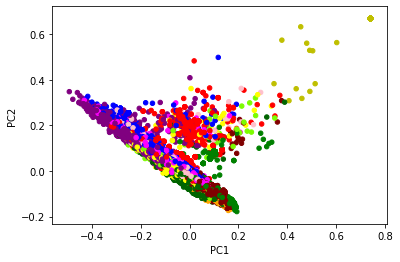

In [67]:
x = pd.DataFrame(pca.transform(X_train), columns=['PC1', 'PC2'], index = X_train.index)
clusters = model.labels_

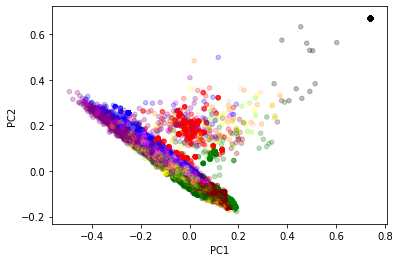

In [85]:
colors = pd.Series(clusters).map({
    0: "red",
    1: "blue",
    2: "yellow",
    3: "green",
    4: "pink",
    5: "maroon",
    6: "magenta",
    7: "purple",
    8: "orange",
    9: "darkgreen",
    10: "lawngreen",
    11: "black",
    12: "darkorange",
})

# replot with alpha = .25

x.plot.scatter(x='PC1', y='PC2', c=colors, alpha=.25)

Here's what the subreddit clustering looks like in reality

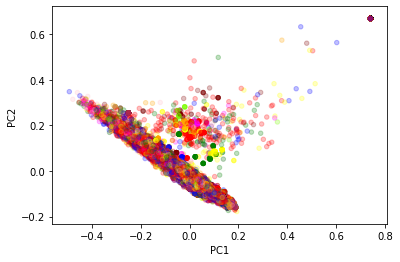

In [89]:
x.plot.scatter(x='PC1', y='PC2', c=colors, alpha=.25)

In the code below I scaled the data here to see if it made any difference

In [42]:
x = pd.DataFrame(pca.fit_transform(df_scaled), columns=['PC1', 'PC2'], index = df_scaled.index)

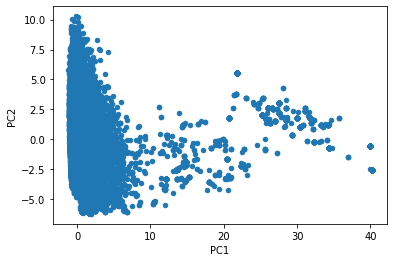

In [44]:
x.plot.scatter(x='PC1', y='PC2')

### Tried to see if only looking at 2 subreddits would change anything (this part is the big mess)

In [119]:
lol_mech = df[(df['subreddit'] == 'malefashionadvice') |  (df['subreddit'] == 'fantanoforever')]
lol_mech_sample = lol_mech.sample(n=250000)[['subreddit', 'body']]
lol_mech_sample

,subreddit,body
7655784,malefashionadvice,Tar-tis
6083076,malefashionadvice,Yes. Also I made a typo- sleeves on the uniqlo...
4867358,malefashionadvice,Thanks! I tend to have trouble with Banana's f...
7404796,malefashionadvice,That's still pretty much true
1272289,malefashionadvice,Surely a v neck t shirt is still a t shirt?
...,...,...
3955811,malefashionadvice,its great. you will be a star.
7181985,fantanoforever,So I would say that he proliferation of hate s...
6916394,malefashionadvice,"Very helpful, thanks!"
2950417,malefashionadvice,Why does it irritate you?\n\nThis guy found a ...


In [120]:
# Use vec from above
from sklearn.feature_extraction.text import CountVectorizer
vec = TfidfVectorizer(max_features=300)
#vec2 = CountVectorizer(max_features=300)
lol_mech_tf = vec.fit_transform(lol_mech_sample['body'].dropna())

In [121]:
df_lol_mech_tf = pd.DataFrame(lol_mech_tf.todense(), columns=vec.get_feature_names(), index=lol_mech_sample.index)

In [122]:
df_lol_mech_tf

,10,10pm,12pm,about,action,actually,advice,after,album,all,...,with,work,would,www,x200b,yeah,year,years,you,your
7655784,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
6083076,0.0,0.0,0.0,0.245496,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4867358,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133523,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.235088,0.000000,0.0
7404796,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1272289,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955811,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.255035,0.0
7181985,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.09144,0.075362,0.0,0.0,0.103031,0.0,0.000000,0.000000,0.0
6916394,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2950417,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.234488,0.104269,0.0


In [123]:
comments = df[['body','subreddit']].dropna()
df_lol_mech = comments.merge(df_lol_mech_tf, left_index=True, right_index=True)
df_lol_mech

,body,subreddit_x,10,10pm,12pm,about,action,actually,advice,after,...,with,work,would,www,x200b,yeah,year,years,you,your
24,Thanks have a great new year you too!,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.4934,0.000000,0.210092,0.000000
25,I know that this looks more like daytime styli...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.346091,0.153895,0.000000
32,0-30-100-200-300-500+,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
57,_Never_ take a selfie with your hand in your p...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164506,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.128792,0.534739
94,My mother has one [like this](https://www.craf...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.197316,0.0,0.0,0.0000,0.000000,0.000000,0.170942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674920,"IMO yes, would work better with more athleisur...",malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296234,0.45039,0.371199,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674930,Anyone got any tips for packing a suit in a ba...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674945,"I might fall into the middle, as I really like...",malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.123286,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.048261,0.066792
7674956,Kinda like some of these.\nStupid question: is...,malefashionadvice,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000


In [124]:
X_train = df_lol_mech.drop(['body', 'subreddit_x'], axis=1)
X_train

,10,10pm,12pm,about,action,actually,advice,after,album,all,...,with,work,would,www,x200b,yeah,year,years,you,your
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.4934,0.000000,0.210092,0.000000
25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.346091,0.153895,0.000000
32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164506,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.128792,0.534739
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.197316,0.0,0.0,0.0000,0.000000,0.000000,0.170942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7674920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.296234,0.45039,0.371199,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000
7674945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.123286,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.048261,0.066792
7674956,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0000,0.000000,0.000000,0.000000


In [125]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [126]:
pca = PCA(2)
df_pca = pd.DataFrame(pca.fit_transform(X_train_scaled), columns=['PC1', 'PC2'], index=df_lol_mech.index)

In [127]:
df_pca

,PC1,PC2
24,-1.595084,-0.364767
25,-1.122155,-0.993065
32,-1.464138,-0.368529
57,-1.374998,1.457763
94,-0.014765,-1.280959
...,...,...
7674920,-1.642009,-0.507554
7674930,-1.369065,-0.051623
7674945,-1.223163,0.435289
7674956,-0.590502,1.946089


In [128]:
df_pca['subreddit'] = df_lol_mech['subreddit_x']
df_pca

,PC1,PC2,subreddit
24,-1.595084,-0.364767,malefashionadvice
25,-1.122155,-0.993065,malefashionadvice
32,-1.464138,-0.368529,malefashionadvice
57,-1.374998,1.457763,malefashionadvice
94,-0.014765,-1.280959,malefashionadvice
...,...,...,...
7674920,-1.642009,-0.507554,malefashionadvice
7674930,-1.369065,-0.051623,malefashionadvice
7674945,-1.223163,0.435289,malefashionadvice
7674956,-0.590502,1.946089,malefashionadvice


In [129]:
colors = pd.Series(df_pca['subreddit']).map({
    'malefashionadvice': "red",
    'fantanoforever': "blue"
})

It's still really ugly when I just plot the data points from the two subreddits

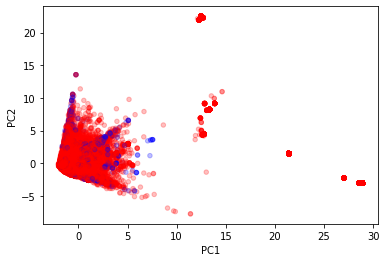

In [130]:
df_pca.plot.scatter(x='PC1', y='PC2', c=colors, alpha=.25)